In [2]:
import pandas as pd
import altair as alt
import os

In [3]:
room_ids = set([x.split("_")[0] for x in os.listdir("data-bms")])
room_ids = list(filter(lambda x: "." not in x, room_ids))
room_ids

['52', '520', '524', '522']

In [4]:
room_df = pd.concat([get_room_df(room) for room in room_ids])
room_df

NameError: name 'get_room_df' is not defined

In [ ]:
weather_df = pd.read_csv("data-bms/weather.csv")
room_df.time = pd.to_datetime(room_df.time).dt.strftime('%Y-%m-%d %H:%M:%S')
weather_df.time = pd.to_datetime(weather_df.time).dt.strftime('%Y-%m-%d %H:%M:%S')


In [5]:
df = pd.merge(room_df, weather_df, on="time")
lst = []


NameError: name 'room_df' is not defined

In [6]:
for v in [17, 18, 20]:
    p1 = res[res.valve == v]
    p1["diff"] = p1.temp_target - p1.temp_act
    print(v, p1["diff"].mean())

NameError: name 'res' is not defined

In [7]:
for v in [17, 18, 20]:
    p1 = res[res.valve == v]
    print(v, p1["temp_delta"].mean())

NameError: name 'res' is not defined

In [8]:
res[res.temp_act != res.next_hour_temp]

NameError: name 'res' is not defined

In [9]:
import matplotlib.pyplot as plt
import numpy as np
v = 20

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

NameError: name 'res' is not defined

In [10]:
v = 18

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 10)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

NameError: name 'res' is not defined

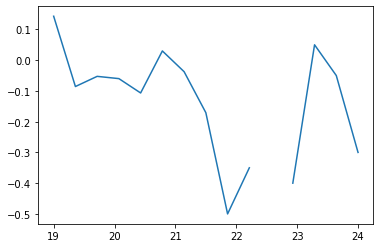

In [ ]:
v = 17

p1 = res[res.valve == v]
# print(v, p1["temp_delta"].mean())
x = np.linspace(p1["temp_act"].min(), p1["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(p1, v, temp), x))
plt.plot(x, y)
plt.show()

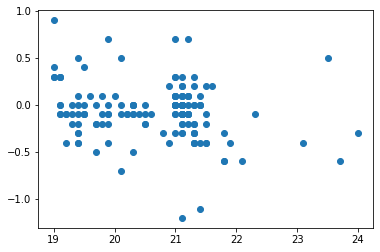

In [ ]:
p1 = res[res.valve == 17]
# print(v, p1["temp_delta"].mean())
plt.scatter(p1["temp_act"], p1["temp_delta"])
plt.show()

In [ ]:
from utils import get_cop
get_cop(-7)

2.8510999999999997

In [11]:
from data_process import get_all_rooms
from util import valve_effectiveness
df = get_all_rooms("data-bms")
valve_effectiveness(df, 20, 18.8)

1.0666666666666655

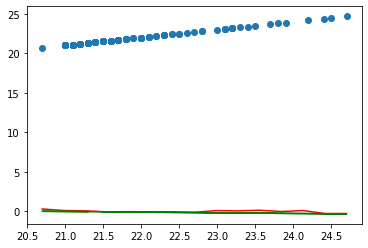

In [31]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 18]
x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(v18, 18, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
plt.scatter(v18["temp_act"], v18["temp_delta"])
# plt.scatter(v18["temp_act"], v18["temp_act"])
plt.plot(x, y, "r")
plt.plot(v18["temp_act"], valve_line(bms_data)[18](v18["temp_act"]), "g")
plt.show()


In [13]:
valve_line(bms_data)[18]([17, 18, 19, 20])

array([0.2897322 , 0.20656089, 0.12338958, 0.04021827])

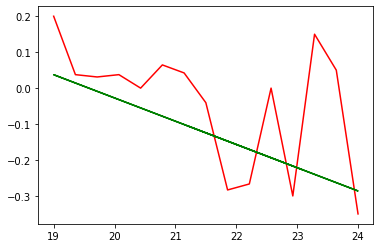

In [14]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 17]
x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 15)
y = list(map(lambda temp: valve_effectiveness(v18, 17, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
# plt.scatter(v18["temp_act"], v18["temp_delta"])
plt.plot(x, y, "r")
plt.plot(v18["temp_act"], valve_line(bms_data)[17](v18["temp_act"]), "g")
plt.show()


In [15]:
valve_line(bms_data)[17]([17, 18, 19, 20])

array([ 0.16674841,  0.1020502 ,  0.037352  , -0.02734621])

 
-0.04821 x + 1.037


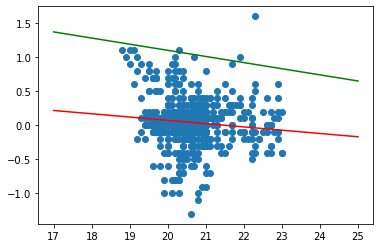

In [23]:
from util import get_cop, get_temp, valve_effectiveness, valve_multiplier
from valve_estimation import valve_line
from data_process import get_all_rooms
import matplotlib.pyplot as plt
import numpy as np
bms_data = get_all_rooms("data-bms")
v18 = bms_data[bms_data["valve"] == 20]
# x = np.linspace(v18["temp_act"].min(), v18["temp_act"].max(), 50)
# y = list(map(lambda temp: valve_effectiveness(v18, 20, temp), x))
# p3 = np.poly1d(np.polyfit(x, y, 1))
# plt.scatter(v18["temp_act"], v18["temp_delta"])
plt.scatter(v18["temp_act"], v18["temp_delta"])
line = np.poly1d(np.polyfit(v18["temp_act"], v18["temp_delta"], 1))
print(line)
line2 = np.poly1d([-0.09, 2.9])
x = np.linspace(17, 25, 20)
plt.plot(x, line(x), "r")
plt.plot(x, line2(x), "g")
# plt.plot(x, valve_line(bms_data)[20](x), "g")
plt.show()


In [17]:
print(valve_line(bms_data)[17]([17, 18, 19, 20, 21, 22]))
print(valve_line(bms_data)[18]([17, 18, 19, 20, 21, 22]))
print(valve_line(bms_data)[20]([17, 18, 19, 20, 21, 22]))

[ 0.16674841  0.1020502   0.037352   -0.02734621 -0.09204441 -0.15674261]
[ 0.2897322   0.20656089  0.12338958  0.04021827 -0.04295304 -0.12612435]
[0.91 0.74 0.57 0.4  0.23 0.06]


In [ ]:
v18 = bms_data[bms_data["valve"] == 20]
v18[v18["temp_act"] < 19]

,time,valve,temp_act,temp_target,presence,room_id,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,next_hour_temp,temp_delta
155,2022-12-25 05:00:00,20.0,18.8,19.0,0.0,522,6.0,5.6,97.0,0.0,NaN,284.0,16.6,NaN,1020.0,NaN,3.0,19.9,1.1
339,2022-12-27 03:00:00,20.0,18.9,21.0,0.0,522,8.0,6.6,91.0,0.0,NaN,263.0,13.7,NaN,1015.8,NaN,3.0,19.9,1.0


In [28]:
bms_data
corr = bms_data[["temp_act", "temp_target", "presence", "temp"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/fz/vff1xm2n6d3_nqh_0k228r9h0000gp/T/ipykernel_1037/2674563513.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,temp_act,temp_target,presence,temp
temp_act,1.00,0.45,0.39,0.01
temp_target,0.45,1.00,0.76,0.02
presence,0.39,0.76,1.00,-0.03
temp,0.01,0.02,-0.03,1.00


In [30]:
bms_data[["temp_act", "temp_target", "presence", "temp", "valve"]].describe()

,temp_act,temp_target,presence,temp,valve
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,20.813809,21.222428,4.515292,7.424467,19.177016
std,0.867708,0.968242,9.795284,2.825066,1.180072
min,18.800000,19.000000,0.000000,0.700000,17.000000
25%,20.200000,21.000000,0.000000,5.500000,18.000000
50%,20.900000,21.000000,0.000000,7.100000,20.000000
75%,21.200000,21.000000,0.000000,9.600000,20.000000
max,24.700000,23.000000,30.000000,14.700000,20.000000
